In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.shape

(294478, 5)

In [4]:
df['converted'].mean()

0.11965919355605512

In [5]:
df.converted.mean()

0.11965919355605512

In [6]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [7]:
df.query('group == "control" and landing_page != "old_page"')

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1
...,...,...,...,...,...
293894,741581,2017-01-09 20:49:03.391764,control,new_page,0
293996,942612,2017-01-08 13:52:28.182648,control,new_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


In [8]:
df.query('group == "treatment" and landing_page != "new_page"')

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
...,...,...,...,...,...
293773,688144,2017-01-16 20:34:50.450528,treatment,old_page,1
293817,876037,2017-01-17 16:15:08.957152,treatment,old_page,1
293917,738357,2017-01-05 15:37:55.729133,treatment,old_page,0
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [10]:
df2t = df.query('group == "treatment" and landing_page == "new_page"')
df2c = df.query('group == "control" and landing_page == "old_page"')

In [11]:
len(df2c)

145274

In [12]:
df2 = df2t.merge(df2c, how='outer')

In [13]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

In [14]:
df2['user_id'].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
290580    False
290581    False
290582    False
290583    False
290584    False
Name: user_id, Length: 290585, dtype: bool

In [15]:
sum(df2['user_id'].duplicated())

1

In [16]:
df2 = df2[~df2['user_id'].duplicated(keep='first')]

In [17]:
df2.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

In [18]:
df2.describe()

,user_id,converted
count,290584.000000,290584.000000
mean,788004.876222,0.119597
std,91224.735468,0.324490
min,630000.000000,0.000000
25%,709034.750000,0.000000
50%,787995.500000,0.000000
75%,866956.250000,0.000000
max,945999.000000,1.000000


In [19]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [20]:
df2.converted.mean() * 100

11.959708724499627

In [21]:
df2_control = df2.query('group == "control"')
df2_treatment = df2.query('group == "treatment"')

In [22]:
df2_control['converted'].mean() * 100

12.03863045004612

In [23]:
df2_treatment['converted'].mean() * 100

11.880806551510565

In [25]:
len(df2_treatment)

145310

In [26]:
df2.converted.mean()

0.11959708724499628

In [27]:
1 - df2.converted.mean()

0.8804029127550037

In [31]:
new_page_converted = np.random.choice([1, 0], size=len(df2_treatment), p=[df2.converted.mean(), (1 - df2.converted.mean())])

(array([127972.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  17338.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

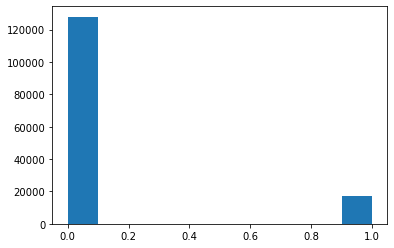

In [33]:
plt.hist(new_page_converted)

In [34]:
old_page_converted = np.random.choice([1, 0], size=len(df2_control), p=[df2.converted.mean(), (1 - df2.converted.mean())])

(array([127814.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  17460.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

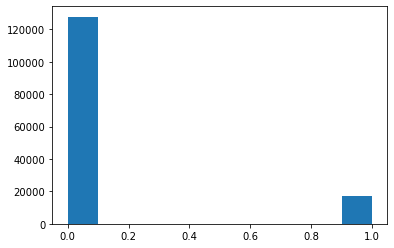

In [35]:
plt.hist(old_page_converted)

In [38]:
len(df2_treatment)

145310

In [42]:
new_page_converted = np.random.binomial(len(df2_treatment), df2.converted.mean(), 10000) / len(df2_treatment)

In [43]:
old_page_converted = np.random.binomial(len(df2_control), df2.converted.mean(), 10000) / len(df2_control)

In [46]:
p_diffs = new_page_converted - old_page_converted

In [52]:
p_diffs

array([-0.00058035,  0.00249635,  0.00092042, ..., -0.00023613,
       -0.00097242,  0.00010122])

In [47]:
p_diffs.mean()

2.7303081973588405e-05

In [51]:
ab_data_diff = df2_treatment['converted'].mean() - df2_control['converted'].mean()
ab_data_diff

-0.0015782389853555567

In [66]:
(p_diffs > ab_data_diff)

array([ True,  True,  True, ...,  True,  True,  True])

In [55]:
(p_diffs > ad_data_diff).mean() * 100

90.53

In [67]:
(p_diffs < ab_data_diff).mean() * 100

9.47

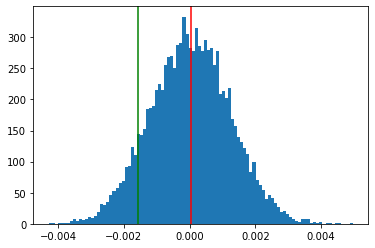

In [65]:
plt.hist(p_diffs, bins=100)
low = ad_data_diff
high = p_diffs.mean()
plt.axvline(x=low, color='g')
plt.axvline(x=high, color='r')

In [68]:
import statsmodels.api as sm

In [70]:
converted_old = len(df2_control[df2_control['converted'] == 1])
converted_new = len(df2_treatment[df2_treatment['converted'] == 1])

In [71]:
converted_old

17489

In [72]:
converted_new

17264

In [73]:
n_old = len(df2_control)
n_new = len(df2_treatment)

In [74]:
n_old

145274

In [75]:
n_new

145310

In [82]:
sm.stats.proportions_ztest([converted_old, converted_new], [n_old, n_new], alternative='larger')

(1.3109241984234394, 0.09494168724097551)